In [1]:
## Poisson Equation
# Load  FEM Packages
from fenics import *
from mshr import *
# Plotting Libraries
import matplotlib.pyplot as plt
plt.style.use("_classic_test_patch")

In [2]:
# Sub domain for no-slip (mark whole boundary, inflow and outflow will overwrite)
class Interior(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary

# Sub domain for inflow (right)
class Left(SubDomain):
    def inside(self, x, on_boundary):
        return x[0] > 1.0 - DOLFIN_EPS and on_boundary

# Sub domain for outflow (left)
class Right(SubDomain):
    def inside(self, x, on_boundary):
        return x[0] < DOLFIN_EPS and on_boundary

class Bottom(SubDomain):
    def inside(self, x, on_boundary):
        return x[1] < DOLFIN_EPS and on_boundary
    
class Top(SubDomain):
    def inside(self, x, on_boundary):
        return x[1] > 1.0 - DOLFIN_EPS and on_boundary
    
# Plotting Function
def PlotFields(u_field, e_field):
    """
    PlotFields(u_field, e_field)
    """
    fig = plt.figure(figsize = (14,10))                       # Set the resolution
    plt.subplot(121)
    figU = plot(u_field)
    plt.colorbar(figU, shrink=0.5)
    plt.title("Potential Field")
    plt.subplot(122)
    figE = plot(e_field)
    plt.colorbar(figE, shrink = 0.5)
    plt.title("Electric Field")
    plt.show()

In [3]:
mesh = Mesh('dolfin_fine.xml.gz')

In [4]:
# Create mesh functions over the cell facets
sub_domains = MeshFunction("size_t", mesh, mesh.topology().dim() - 1)
# Mark all facets as sub domain 5
sub_domains.set_all(5)

interior = Interior()
left     = Left()
right    = Right()
bottom   = Bottom()
top      = Top()

interior.mark(sub_domains, 0)
left.mark(sub_domains, 1)
right.mark(sub_domains, 2)
bottom.mark(sub_domains, 3)
top.mark(sub_domains, 4)

In [5]:
V = FunctionSpace(mesh, 'P', 1)
# Boundary Conditions
bc0 = DirichletBC(V, Constant(2.0), sub_domains, 0)
bc1 = DirichletBC(V, Constant(0.0), sub_domains, 1)
bc2 = DirichletBC(V, Constant(0.0), sub_domains, 2)
bc3 = DirichletBC(V, Constant(0.0), sub_domains, 3)
bc4 = DirichletBC(V, Constant(0.0), sub_domains, 4)
bcs = [bc0, bc1, bc2, bc3, bc4]

In [6]:
u = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(u), grad(v)) * dx
L = Constant('0') * v * dx
u = Function(V)
set_log_level(LogLevel.ERROR) # Suppress FEniCS output
solve(a == L, u, bcs)

Solving linear variational problem.


In [ ]:
# Save solution to file in VTK format
vtkfile = File('Dolphin/DolphinPotential.pvd')
vtkfile << u

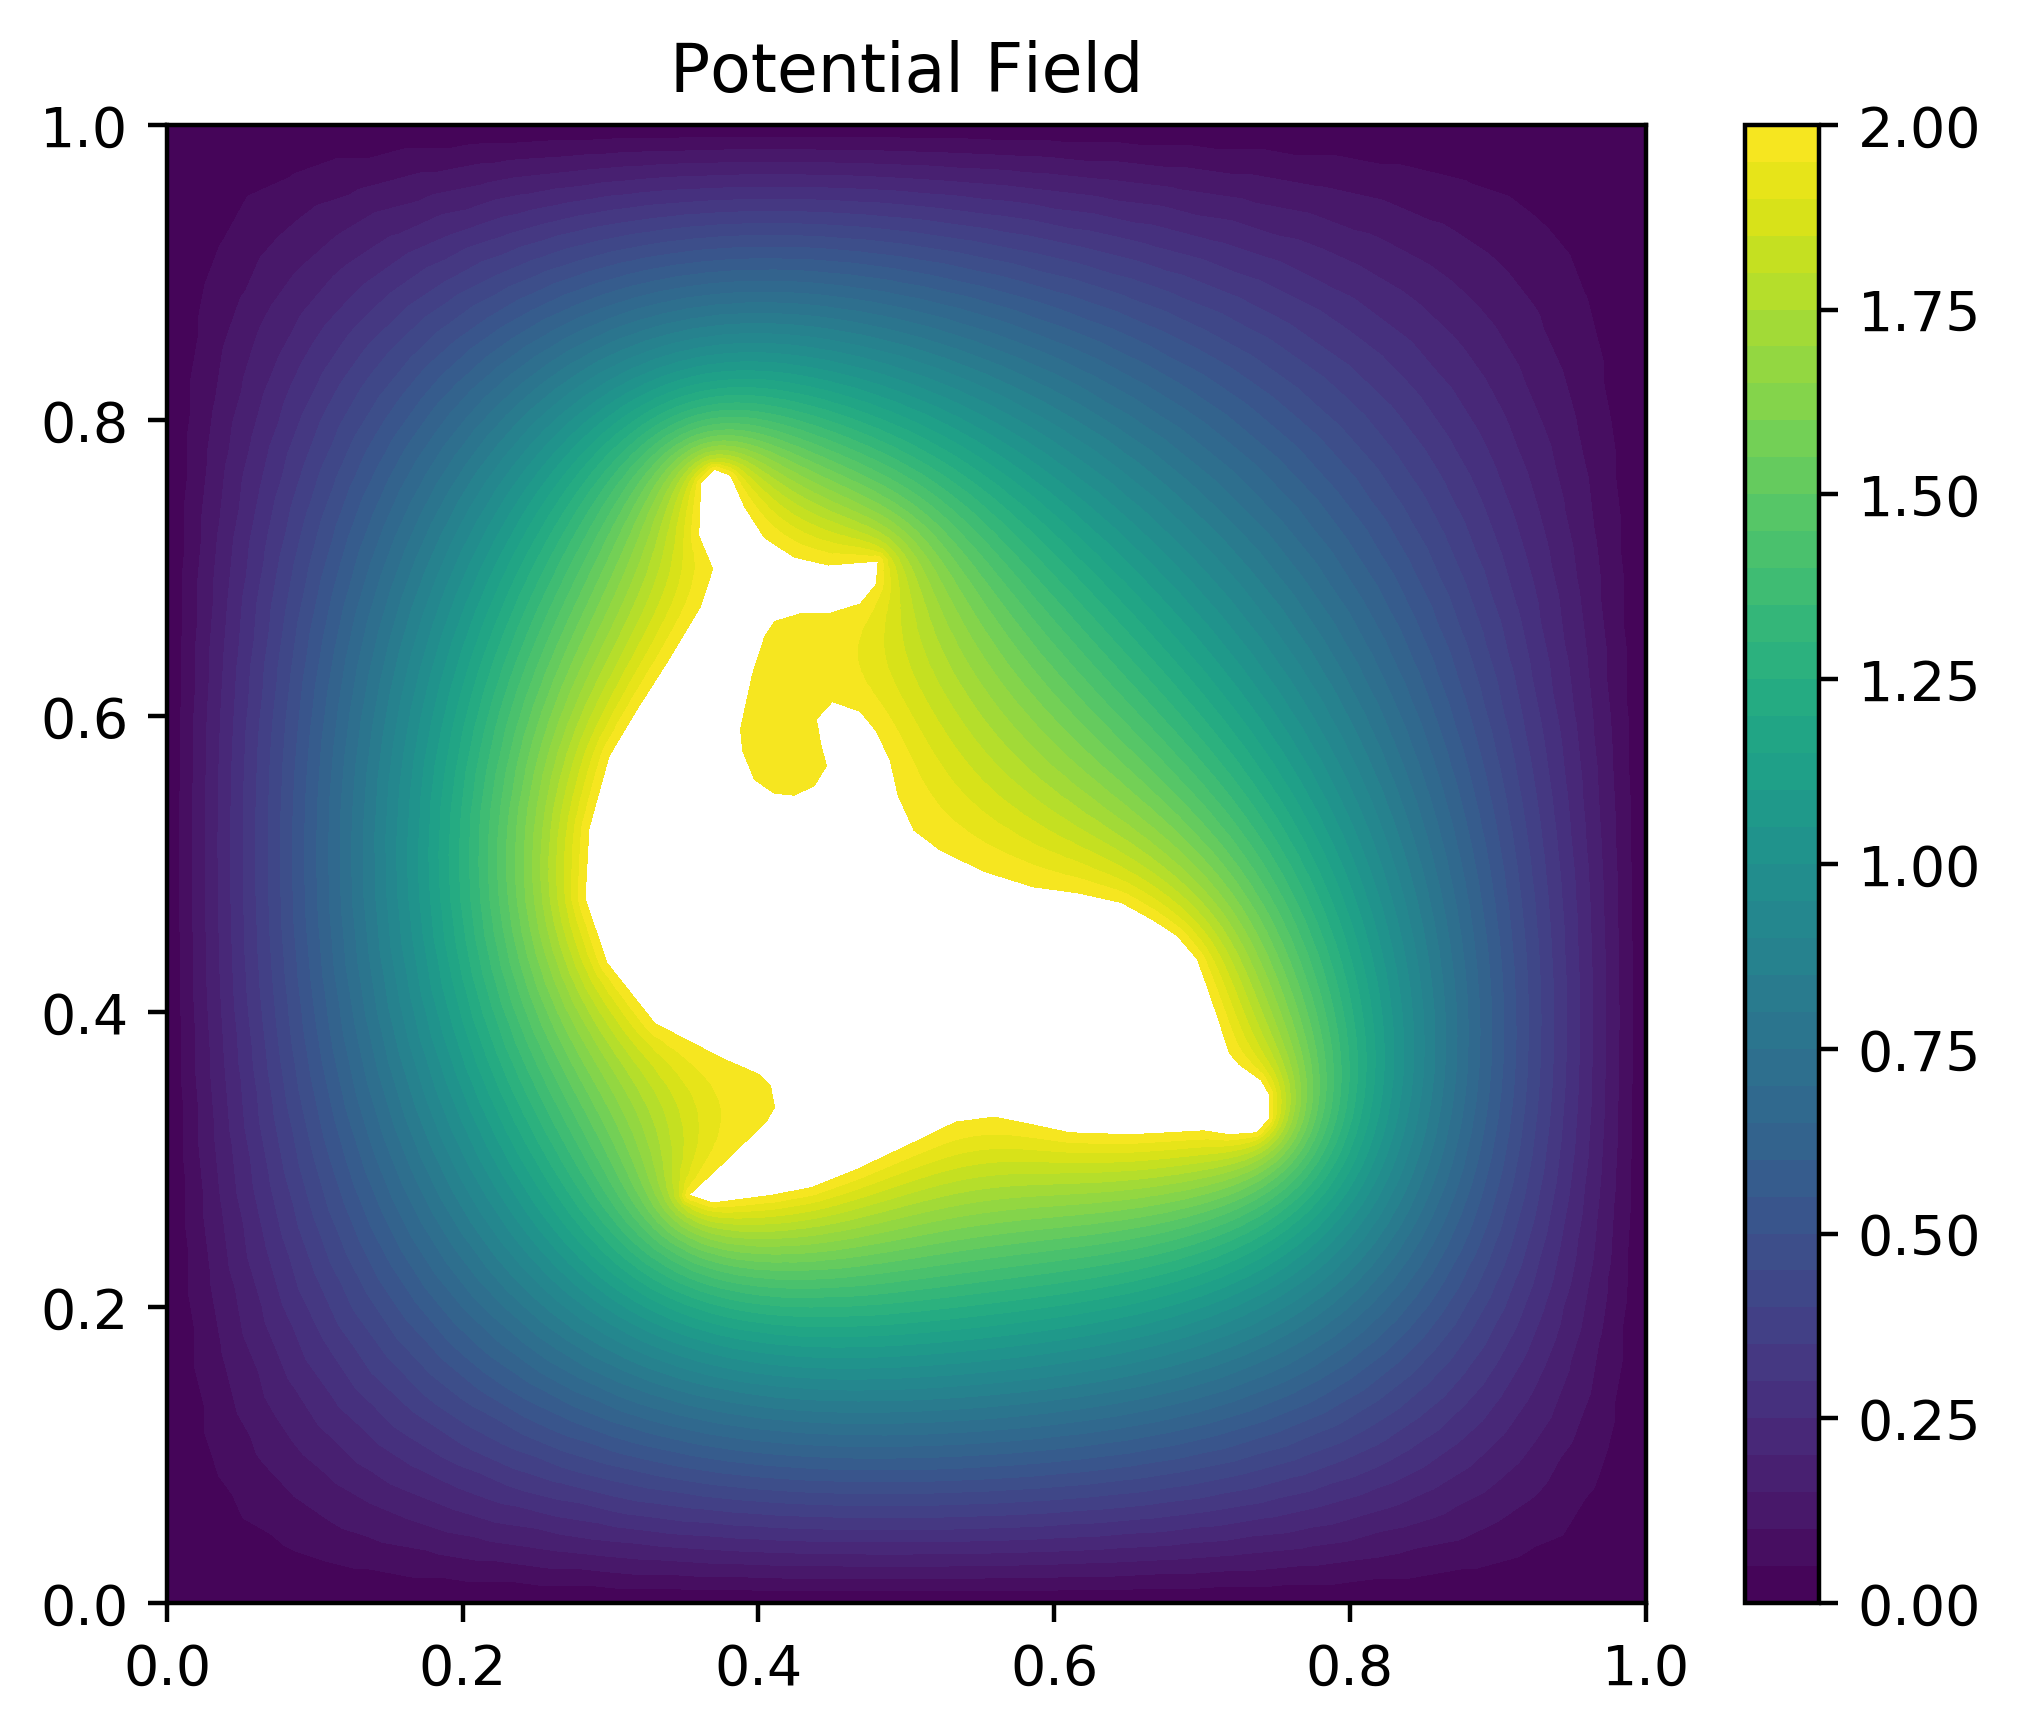

In [7]:
## Plotting the solution.
plt.figure(dpi=400)                       # Set the resolution
plot(u, title = 'Potential Field')              # Set the title
plt.colorbar(plot(u)) # Add a colorbar
plt.show()

Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.


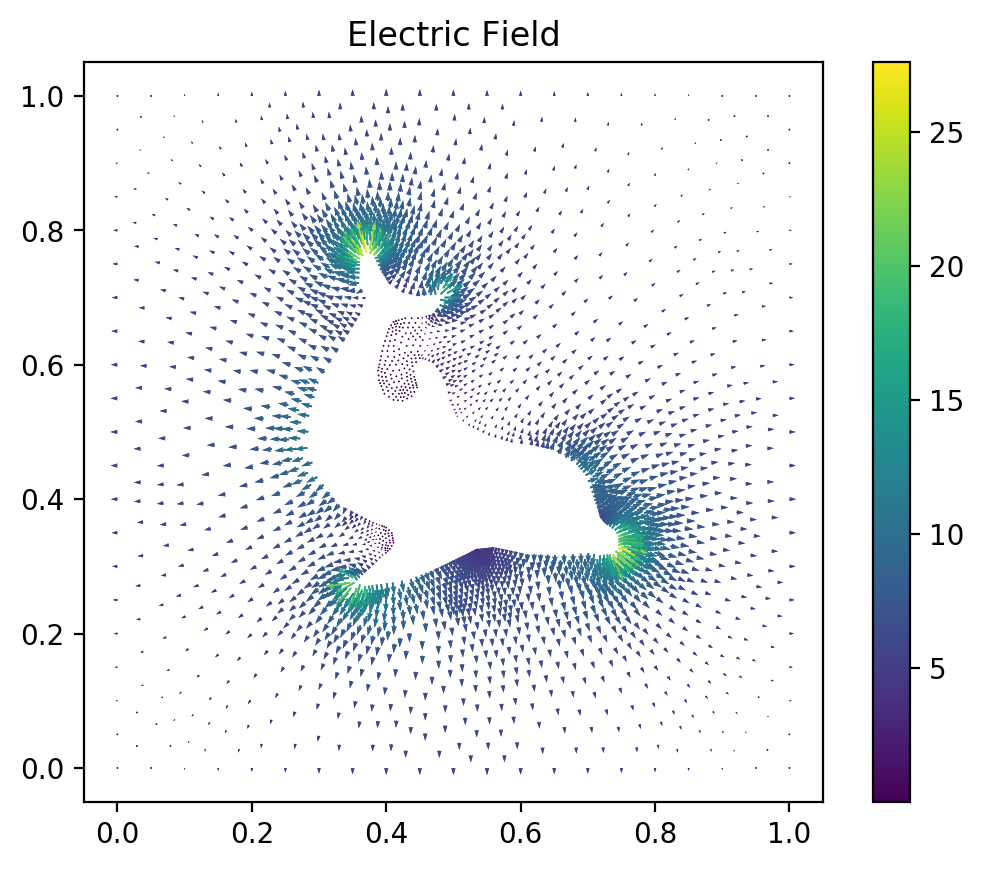

In [8]:
## Plotting the electric field.
e_field = - grad(u)
plt.figure(dpi=200)                       # Set the resolution
plot(e_field, title = 'Electric Field')              # Set the title
plt.colorbar(plot(e_field)) # Add a colorbar
plt.show()                  # Set the title

Object cannot be plotted directly, projecting to piecewise linears.


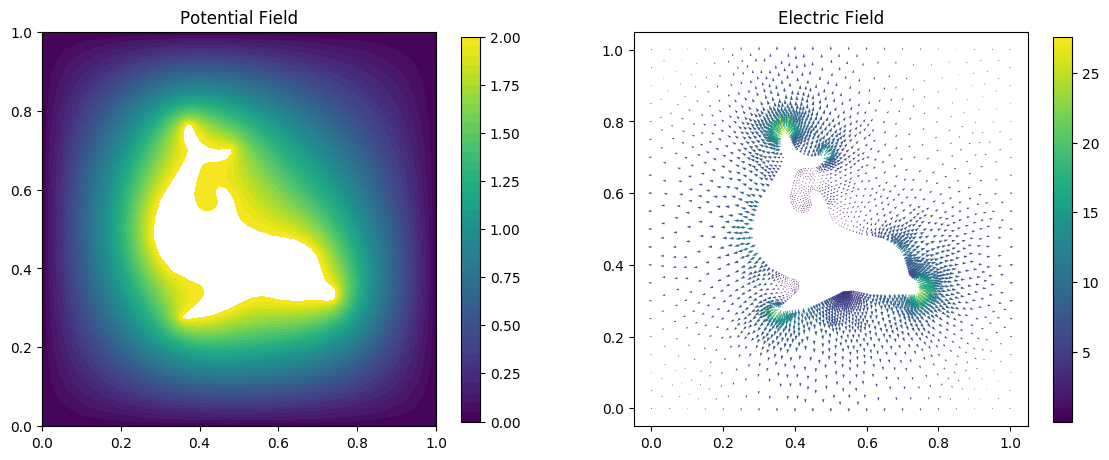

In [9]:
PlotFields(u, project(e_field))

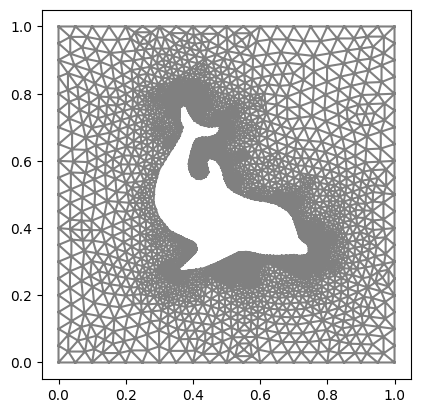

In [10]:
# plot(mesh)